In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/TopPlayers.csv')

In [3]:
df.head(5)

,name,rank,rating,country,title,profilelink,profileimage,lastupdated
0,Magnus Carlsen,1,2830,Norway,GM,https://www.chess.com/players/magnus-carlsen,https://images.chesscomfiles.com/uploads/v1/ma...,03-12-2023
1,Fabiano Caruana,2,2796,United States,GM,https://www.chess.com/players/fabiano-caruana,https://images.chesscomfiles.com/uploads/v1/ma...,03-12-2023
2,Hikaru Nakamura,3,2788,United States,GM,https://www.chess.com/players/hikaru-nakamura,https://images.chesscomfiles.com/uploads/v1/ma...,03-12-2023
3,Ding Liren,4,2780,China,GM,https://www.chess.com/players/ding-liren,https://images.chesscomfiles.com/uploads/v1/ma...,03-12-2023
4,Ian Nepomniachtchi,5,2770,Russia,GM,https://www.chess.com/players/ian-nepomniachtchi,/bundles/web/images/user-image.007dad08.svg,03-12-2023


In [4]:
df.tail(5)

,name,rank,rating,country,title,profilelink,profileimage,lastupdated
247931,Jasper Kamphuis,17113,2064,Netherlands,NaN,https://www.chess.com/players/jasper-kamphuis,/bundles/web/images/user-image.007dad08.svg,16-12-2023
247932,Khherdekar Sauravh,17113,2064,India,FM,https://www.chess.com/players/khherdekar-sauravh,/bundles/web/images/user-image.007dad08.svg,16-12-2023
247933,Branimir Kostic,17113,2064,Serbia,FM,https://www.chess.com/players/branimir-kostic,/bundles/web/images/user-image.007dad08.svg,16-12-2023
247934,Samuele Mammi,17113,2064,Italy,NaN,https://www.chess.com/players/samuele-mammi,/bundles/web/images/user-image.007dad08.svg,16-12-2023
247935,Evert Janse,17113,2064,Netherlands,NaN,https://www.chess.com/players/evert-janse,/bundles/web/images/user-image.007dad08.svg,16-12-2023


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247936 entries, 0 to 247935
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   name          247936 non-null  object
 1   rank          247936 non-null  object
 2   rating        247936 non-null  object
 3   country       247936 non-null  object
 4   title         125154 non-null  object
 5   profilelink   247936 non-null  object
 6   profileimage  247936 non-null  object
 7   lastupdated   247936 non-null  object
dtypes: object(8)
memory usage: 15.1+ MB


In [6]:
n_ind = df[df['rating'] == 'N'].index
df = df.drop(n_ind)

In [7]:
df.describe()

,name,rank,rating,country,title,profilelink,profileimage,lastupdated
count,246937,246937,246937,246937,124555,246937,246937,246937
unique,25022,786,795,158,8,25083,201,14
top,Alen Rakhimzhan,15398,2085,Germany,FM,https://www.chess.com/players/josh-guo,/bundles/web/images/user-image.007dad08.svg,03-12-2023
freq,54,1414,1414,31358,56605,53,245194,27004


In [1]:
df = df.drop_duplicates()

NameError: name 'df' is not defined

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202044 entries, 0 to 247935
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   name          202044 non-null  object
 1   rank          202044 non-null  object
 2   rating        202044 non-null  object
 3   country       202044 non-null  object
 4   title         104362 non-null  object
 5   profilelink   202044 non-null  object
 6   profileimage  202044 non-null  object
 7   lastupdated   202044 non-null  object
dtypes: object(8)
memory usage: 13.9+ MB


In [10]:
df = df.rename(columns={'rating': 'elo'})

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df_o = df

In [13]:
df["elo"] = df["elo"].astype(int)
df["rank"] = df["rank"].astype(int)

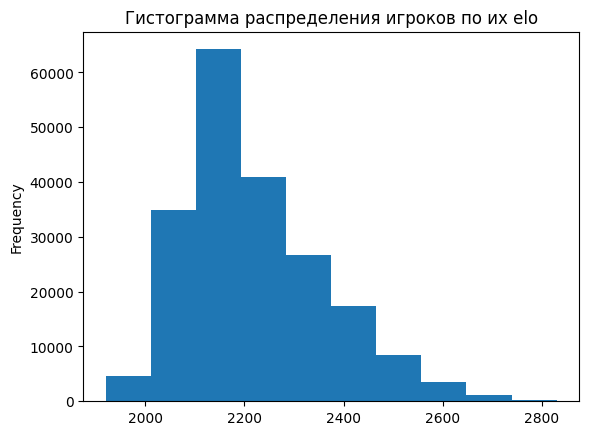

In [14]:
plt.figure()
df['elo'].plot(kind='hist')
plt.title('Гистограмма распределения игроков по их elo')
plt.savefig('../pics/histogram.png')

/Users/sergejkotov/Desktop/ml/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


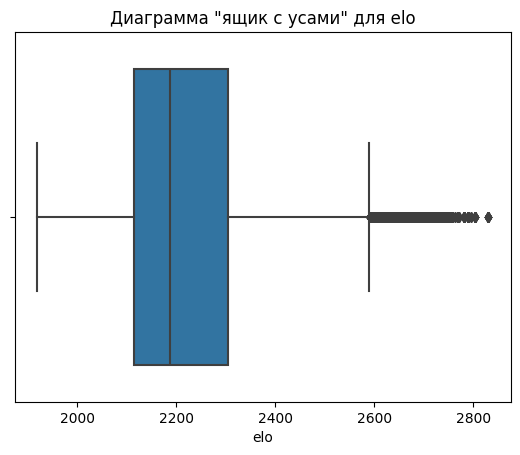

In [15]:
plt.figure()
sns.boxplot(x=df['elo'])
plt.title('Диаграмма "ящик с усами" для elo')
plt.savefig('../pics/boxplot.png')

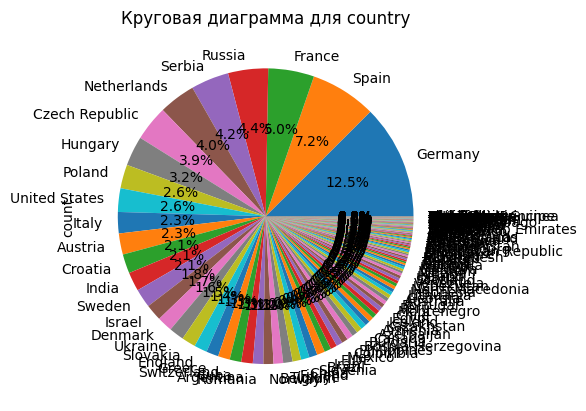

In [16]:
plt.figure()
df['country'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Круговая диаграмма для country')
plt.savefig('../pics/piechart.png')

In [17]:
df.isnull().sum()

name                0
rank                0
elo                 0
country             0
title           97682
profilelink         0
profileimage        0
lastupdated         0
dtype: int64

In [18]:
df['title'].fillna(df['title'].mode()[0], inplace=True)

In [19]:
df['country'] = pd.Categorical(df['country']).codes
df['title'] = pd.Categorical(df['title']).codes

In [27]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 1.2 MB/s eta 0:00:0000:0100:010m
  Attempting uninstall: pip
    Found existing installation: pip 23.3.1
    Uninstalling pip-23.3.1:
      Successfully uninstalled pip-23.3.1


In [32]:
!pip install --upgrade seaborn

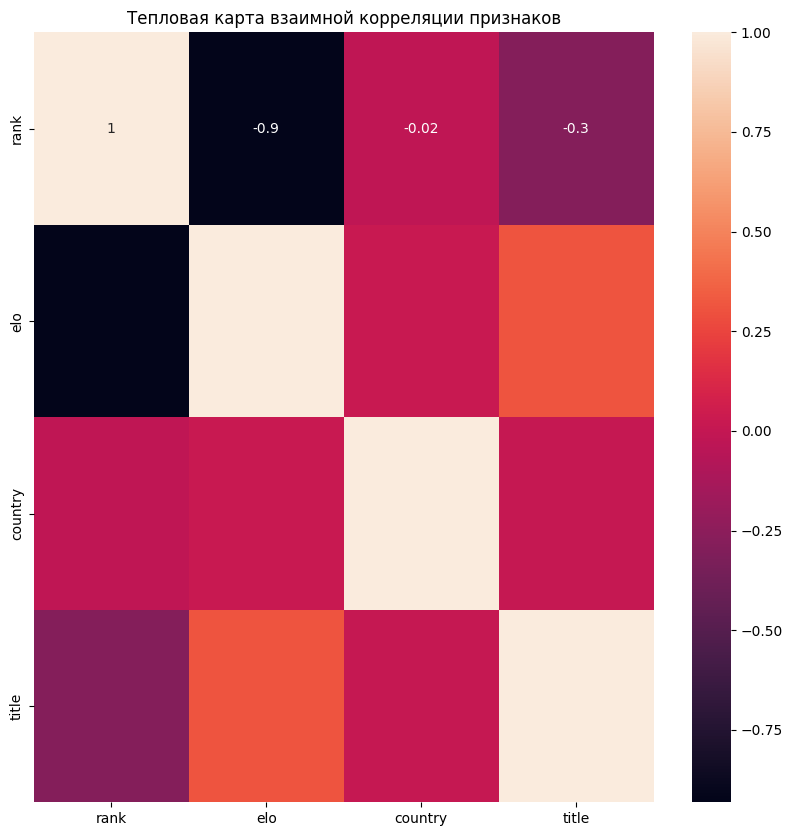

In [30]:
plt.figure(figsize=(10, 10))
corr = df_o[['rank', 'elo', 'country', 'title']].corr()
sns.heatmap(corr, annot=True, fmt='.1g')
plt.title('Тепловая карта взаимной корреляции признаков')
plt.savefig('../pics/heatmap.png')

/Users/sergejkotov/Desktop/ml/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sergejkotov/Desktop/ml/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sergejkotov/Desktop/ml/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sergejkotov/Desktop/ml/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

AttributeError: 'numpy.int16' object has no attribute 'startswith'

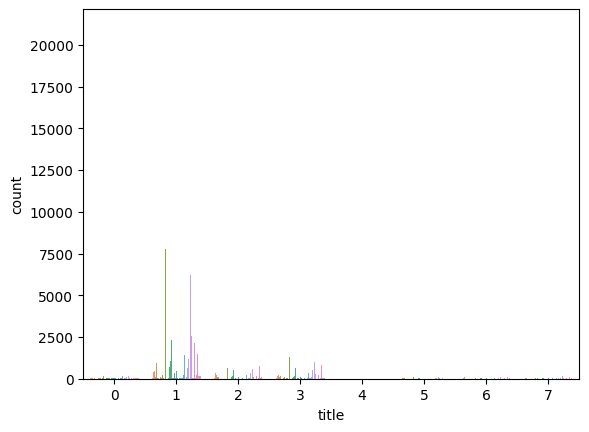

In [21]:
plt.figure()
sns.countplot(x='title', hue='country', data=df_o)
plt.title('Диаграмма countplot с группировкой по country и title')
plt.savefig('../pics/countplot.png')

In [108]:
from scipy import stats

In [109]:
numeric_feature = df['elo']
sample = numeric_feature.sample(200)
statistic, p_value = stats.normaltest(sample)
print(statistic)
print(p_value)
if p_value < 0.05:
    print("Не норм")
else:
    print("Норм")

24.547175402394814
4.673568238862251e-06
Не норм


In [110]:
df = pd.get_dummies(df, columns=df[['country', 'title']].columns)

In [111]:
df

,name,rank,elo,profilelink,profileimage,lastupdated,country_0,country_1,country_2,country_3,...,country_156,country_157,title_0,title_1,title_2,title_3,title_4,title_5,title_6,title_7
0,Magnus Carlsen,1,2830,https://www.chess.com/players/magnus-carlsen,https://images.chesscomfiles.com/uploads/v1/ma...,03-12-2023,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,Fabiano Caruana,2,2796,https://www.chess.com/players/fabiano-caruana,https://images.chesscomfiles.com/uploads/v1/ma...,03-12-2023,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,Hikaru Nakamura,3,2788,https://www.chess.com/players/hikaru-nakamura,https://images.chesscomfiles.com/uploads/v1/ma...,03-12-2023,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,Ding Liren,4,2780,https://www.chess.com/players/ding-liren,https://images.chesscomfiles.com/uploads/v1/ma...,03-12-2023,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,Ian Nepomniachtchi,5,2770,https://www.chess.com/players/ian-nepomniachtchi,/bundles/web/images/user-image.007dad08.svg,03-12-2023,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247930,Jan Rogiers,17113,2064,https://www.chess.com/players/jan-rogiers,/bundles/web/images/user-image.007dad08.svg,16-12-2023,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
247931,Jasper Kamphuis,17113,2064,https://www.chess.com/players/jasper-kamphuis,/bundles/web/images/user-image.007dad08.svg,16-12-2023,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
247933,Branimir Kostic,17113,2064,https://www.chess.com/players/branimir-kostic,/bundles/web/images/user-image.007dad08.svg,16-12-2023,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
247934,Samuele Mammi,17113,2064,https://www.chess.com/players/samuele-mammi,/bundles/web/images/user-image.007dad08.svg,16-12-2023,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
df.to_csv("../data/TopPlayers_changed.csv")